In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
penguins = pd.read_csv('palmer_penguins.csv')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


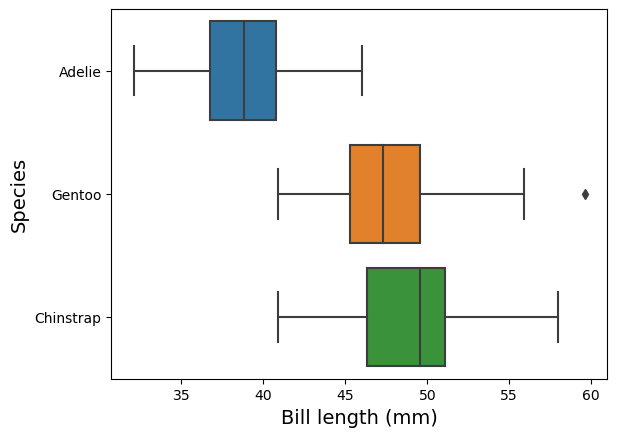

In [2]:
# Box plot of bill length by species
p = sns.boxplot(data=penguins, x='bill_length_mm', y='species')
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Species', fontsize=14)
plt.show()

In [3]:
# Calculate z-scores of bill length for each species
speciesGroups = penguins.groupby('species')

# z-score = a measure of how far an observation is from the mean
# z-score = (obs-mean)/SD
penguins['bill_length_z'] = speciesGroups['bill_length_mm'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Sort the result by the largest absolute z-score
penguins.sort_values(by=['bill_length_z'], ascending=False, key=lambda x: abs(x)).head(
    5
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_z
185,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,male,2007,3.924621
293,Chinstrap,Dream,58.0,17.8,181.0,3700.0,female,2007,2.744976
253,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,male,2009,2.724046
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,male,2007,2.706539
73,Adelie,Torgersen,45.8,18.9,197.0,4150.0,male,2008,2.631447


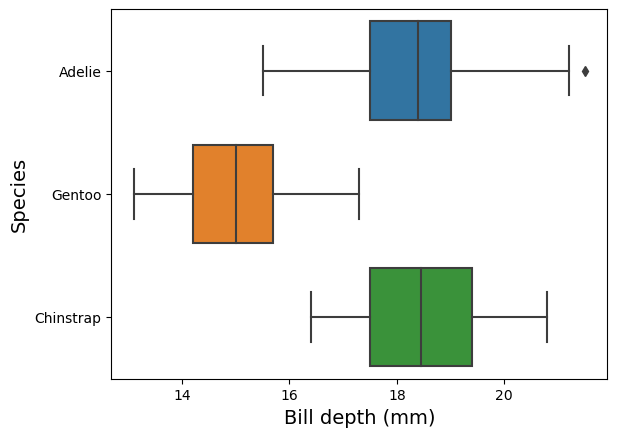

In [4]:
# Box plot of bill depth by species
p = sns.boxplot(data=penguins, x='bill_depth_mm', y='species')
p.set_xlabel('Bill depth (mm)', fontsize=14)
p.set_ylabel('Species', fontsize=14)
plt.show()

In [5]:
# Calculate z-scores of bill depth for each species
speciesGroups = penguins.groupby('species')

# z-score = a measure of how far an observation is from the mean
# z-score = (obs-mean)/SD
penguins['bill_depth_z'] = speciesGroups['bill_depth_mm'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Sort the result by the largest absolute z-score
penguins.sort_values(by=['bill_depth_z'], ascending=False, key=lambda x: abs(x)).head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_z,bill_depth_z
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,male,2007,2.706539,2.592071
237,Gentoo,Biscoe,50.8,17.3,228.0,5600.0,male,2009,1.069200,2.362250
189,Gentoo,Biscoe,44.4,17.3,219.0,5250.0,male,2008,-1.007470,2.362250
49,Adelie,Dream,42.3,21.2,191.0,4150.0,male,2007,1.317340,2.345492
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007,-0.071859,2.345492


Text(39.4, 13.7, 'C')

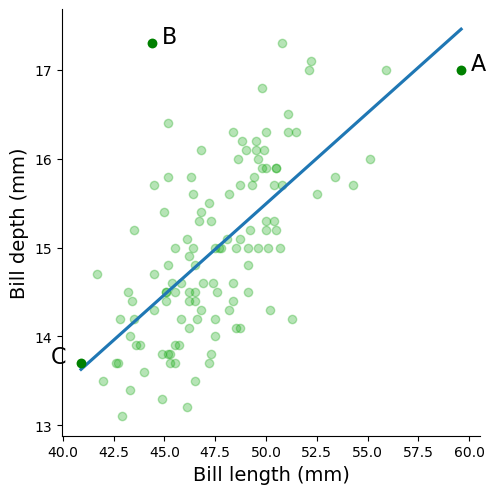

In [6]:
# Create a subset containing only Gentoo penguins
gentoo = penguins[penguins['species'] == 'Gentoo']

plt.rcParams["figure.figsize"] = (10, 5)

p = sns.lmplot(
    data=gentoo,
    x='bill_length_mm',
    y='bill_depth_mm',
    scatter_kws={'alpha': 0.3, 'color': '#10a60e'},
    ci=False,
)
p.set_axis_labels('Bill length (mm)', 'Bill depth (mm)', fontsize=14)
plt.plot(59.6, 17, 'go')
plt.text(59.6 + 0.5, 17, 'A', fontsize=16)
plt.plot(44.4, 17.3, 'go')
plt.text(44.4 + 0.5, 17.3, 'B', fontsize=16)
plt.plot(40.9, 13.7, 'go')
plt.text(40.9 - 1.5, 13.7, 'C', fontsize=16)